In [1]:
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=14)
fillColor <- '#7afaad'
borderColor <- '#000000'

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
# Para mostrar las n primeras lineas podremos usar la funcion ya definida head, a la que se le pasa dicho
# parametro indicando las filas a mostrar o podemos usar la version directa usanto data[1:n,], donde data serán
# los datos que estemos manejando
head(airbnb, n=1)
airbnb[1:6, ]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA


,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

names(airbnb) <- newnames
names(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb[["MetrosCuadrados"]] <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '28' ] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '' ] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '-' ] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n20882'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051'] <- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid 28004'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805'] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815'] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013'] <- '28013'

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
airbnb <- droplevels(airbnb)
levels(airbnb$CodigoPostal)

[1] "20013" "20126" "2015"  "25008" "27004" "27013" "28001" "28002" "28003"
[10] "28004" "28005" "28006" "28007" "28008" "28009" "28010" "28011" "28012"
[19] "28013" "28014" "28015" "28016" "28017" "28018" "28019" "28020" "28021"
[28] "28022" "28023" "28024" "28025" "28026" "28027" "28028" "28029" "28030"
[37] "28031" "28032" "28033" "28034" "28035" "28036" "28037" "28038" "28039"
[46] "28040" "28041" "28042" "28043" "28044" "28045" "28046" "28047" "28048"
[55] "28049" "28050" "28051" "28052" "28053" "28054" "28055" "28056" "28058"
[64] "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
t <- table(airbnb$CodigoPostal)
ts <- sort(t)

mostAppearences <- tail(ts, n=5)
print("Los códigos postales con mayor número de entrada son: ")
mostAppearences

lessAppearences <- head(ts, n=5)
print("Los códigos postales con menor número de entrada son: ")
lessAppearences

[1] "Los códigos postales con mayor número de entrada son: "



28014 28013 28005 28004 28012 
  630  1020  1195  1796  2060 

[1] "Los códigos postales con menor número de entrada son: "



20013 20126  2015 25008 27004 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [9]:
print("Los barrios para el código postal '28012' son: ")
levels(with(airbnb, Barrio[CodigoPostal==28012]))

[1] "Los barrios para el código postal '28012' son: "


[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [10]:
print("Para cada barrio del código postal '28012' tienen estas entradas: ")
table(droplevels(airbnb$Barrio[airbnb$CodigoPostal==28012]))

[1] "Para cada barrio del código postal '28012' tienen estas entradas: "



        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

#### Los codigos postales

En España un código postal sigue el siguiente patron AABCC, donde:
 - AA: Código de provincia
 - B: Capital de provincia
 - CC: Distrito postal
 
Con esto se deduce que un mismo código postal estara en distintos barrios ya que estos a su vez son un nivel de division inferior de los distritos, por lo que dependiendo que es lo que se quiere medir será una medida valida o no.

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [11]:
neighborhoods <- table(airbnb$Barrio)
print(paste("En todo el datase hay",nrow(neighborhoods),"en todo el dataset"))

[1] "En todo el datase hay 125 en todo el dataset"


¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
sortedNeighborhoods <- sort(neighborhoods)
print("Los barrios con mayor numero de entradas son:")
tail(sortedNeighborhoods, n=5)

[1] "Los barrios con mayor numero de entradas son:"



   Justicia         Sol     Palacio Universidad Embajadores 
        785         940        1083        1358        1844 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
rentType <- table(airbnb$TipoAlquiler)
print(paste("Los tipos de alquiler (un total de", length(airbnb$TipoAlquiler),"entradas) son:"))
rentType

[1] "Los tipos de alquiler (un total de 13207 entradas) son:"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

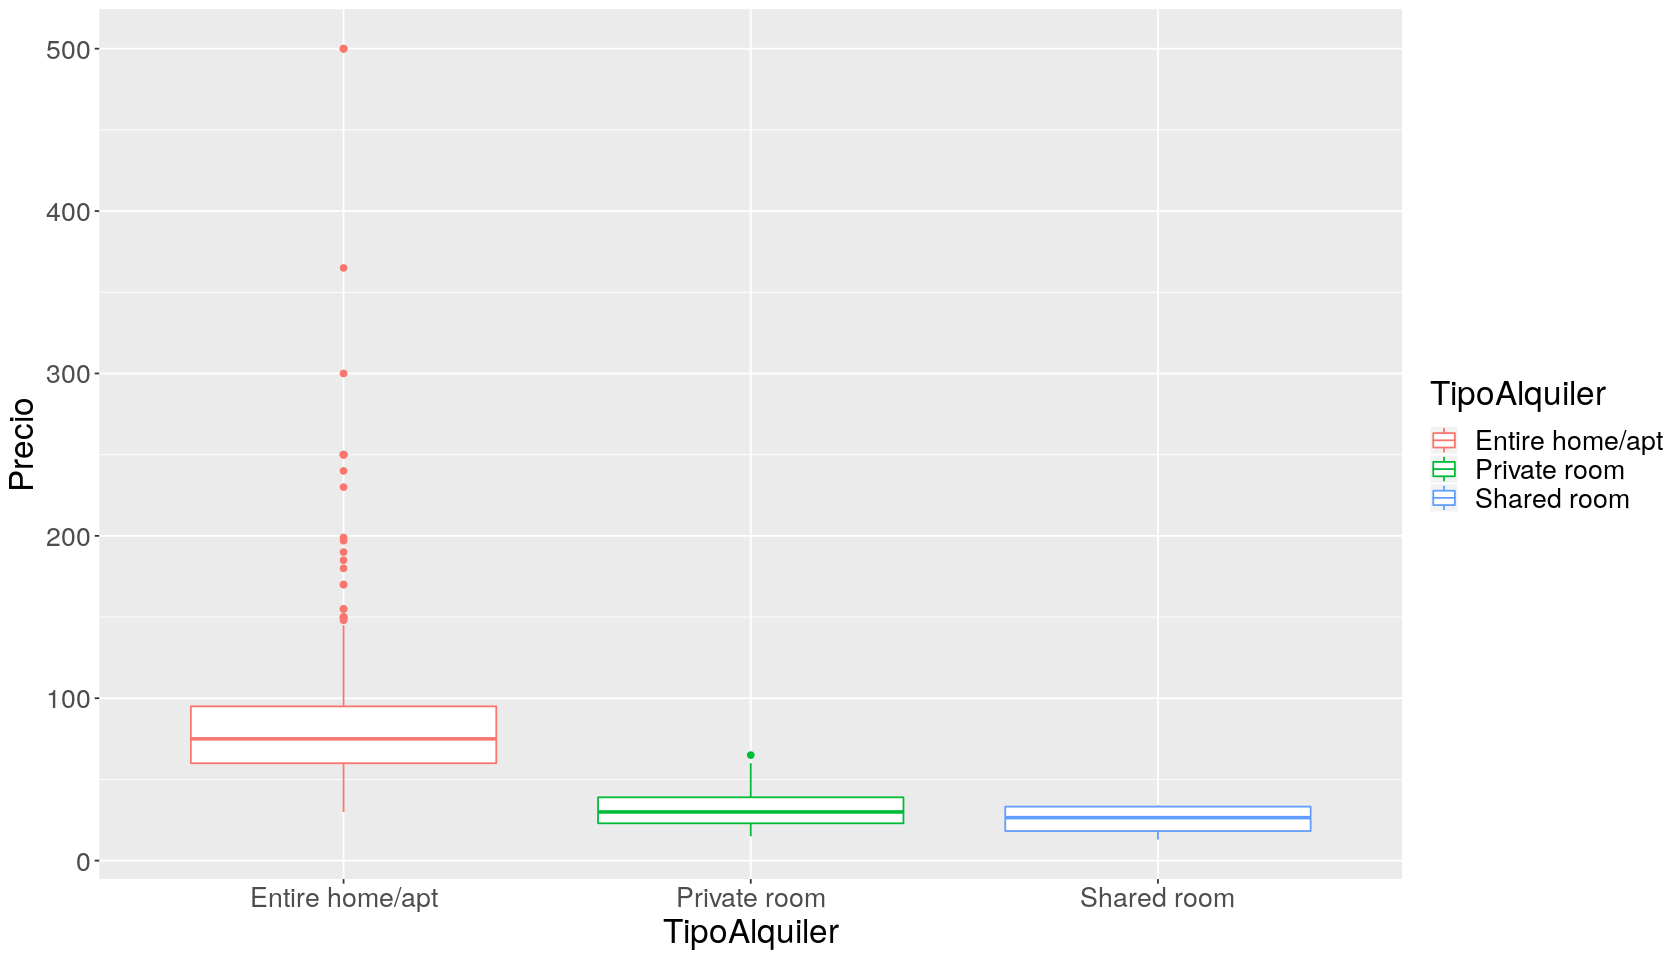

In [14]:
ggplot(na.omit(airbnb),aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+
    geom_boxplot()+
    scale_color_discrete(name="TipoAlquiler")+
    theme(tex=element_text(size=20))

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [15]:
TukeyHSD(aov( Precio ~ TipoAlquiler, data=airbnb))

for (it in unique(airbnb$TipoAlquiler)) {
    m <-  mean(with(airbnb, na.omit(Precio[TipoAlquiler == it])))
    print(paste("El precio medio para (", it,") es de:", m,"€"))
}

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Precio ~ TipoAlquiler, data = airbnb)

$TipoAlquiler
                                   diff       lwr        upr     p adj
Private room-Entire home/apt -53.041470 -55.12724 -50.955700 0.0000000
Shared room-Entire home/apt  -57.443203 -65.95082 -48.935587 0.0000000
Shared room-Private room      -4.401733 -12.96392   4.160453 0.4501858


[1] "El precio medio para ( Private room ) es de: 34.255135981217 €"
[1] "El precio medio para ( Entire home/apt ) es de: 87.2966058763931 €"
[1] "El precio medio para ( Shared room ) es de: 29.8534031413613 €"


Como podemos ver las medias de los distintos tipos de alquiler es mastante significativa ya que a mayor 'privacidad' mayor será el precio medio a pagar. 

Para testar usaremos el test de Tukey ya que determina las medias significativos entre pares de grupos.

--------------------------------------------------------------------------------------------------------------

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [16]:
airbnb_entire <- subset(airbnb, TipoAlquiler == 'Entire home/apt')
print(paste("El nuevo dataset tinene", nrow(airbnb_entire),"entradas"))

[1] "El nuevo dataset tinene 7903 entradas"


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [17]:
neighborhoods_entire <- table(airbnb_entire$Barrio)
sortedNeighborhoods_entire <- sort(neighborhoods_entire)
print("Los barrios con mayor numero de entradas para el tipo del alqiler 'Entire home/apt' son:")
tail(sortedNeighborhoods_entire, n=5)

[1] "Los barrios con mayor numero de entradas para el tipo del alqiler 'Entire home/apt' son:"



     Cortes         Sol     Palacio Universidad Embajadores 
        574         701         769         984        1228 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [18]:
nepm <- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
s_nepm <- nepm[order(nepm$Precio),]
print("Los barrios con mayor precio medio ara un apartamento completo de alquiler son:")
tail(s_nepm, n=5)

[1] "Los barrios con mayor precio medio ara un apartamento completo de alquiler son:"


,Barrio,Precio
,<fct>,<dbl>
30,Castellana,141.3889
43,El Plantío,150.0000
93,Recoletos,161.9254
50,Fuentelareina,180.0000
77,Palomas,309.7500


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [19]:
nepf <- data.frame(with(airbnb_entire, table(Barrio)))
nepf <- nepf[nepf$Freq > 0,]

nep_df <- merge(nepm, nepf)

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [20]:
s_nep_df <- nep_df[nep_df$Freq > 100,]
s_nep_df <- s_nep_df[order(s_nep_df$Precio),]
print("El prrecio de los 5 barrios mas caros que tienen mas de 100 entradas son: ")
tp_f_nep_df <- tail(s_nep_df, n=5)
tp_f_nep_df

[1] "El prrecio de los 5 barrios mas caros que tienen mas de 100 entradas son: "


,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
59,Justicia,98.25468,534
108,Trafalgar,98.57848,223
106,Sol,100.75036,701
52,Goya,111.33803,142
93,Recoletos,161.92537,135


Dibuja el diagrama de densidad de distribución de los diferentes precios

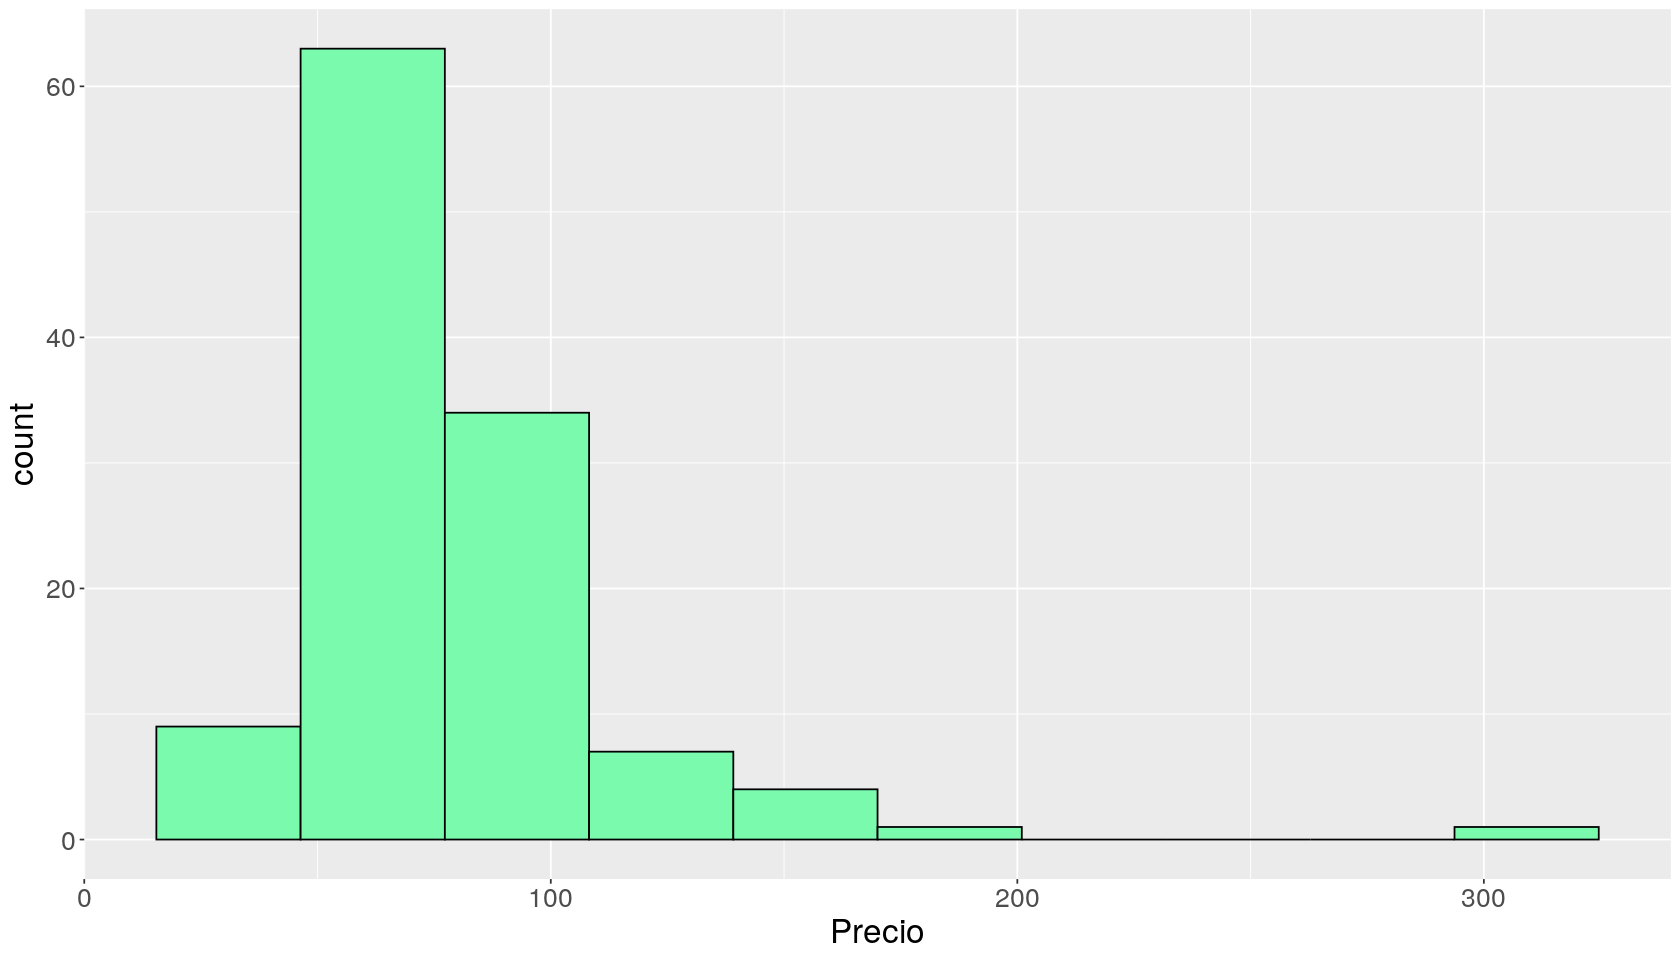

In [21]:
ggplot(data=nep_df, aes(Precio))+
  geom_histogram(bins=10,fill=fillColor,color=borderColor)+ 
theme(tex=element_text(size=20))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [22]:
selected_n <- airbnb_entire[airbnb_entire$Barrio %in% tp_f_nep_df$Barrio,]
sqf_n <- aggregate(MetrosCuadrados~Barrio,selected_n,mean,na.rm=TRUE)
tp_f_nep_df <-merge(tp_f_nep_df, sqf_n) 
tp_f_nep_df

Barrio,Precio,Freq,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


 Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

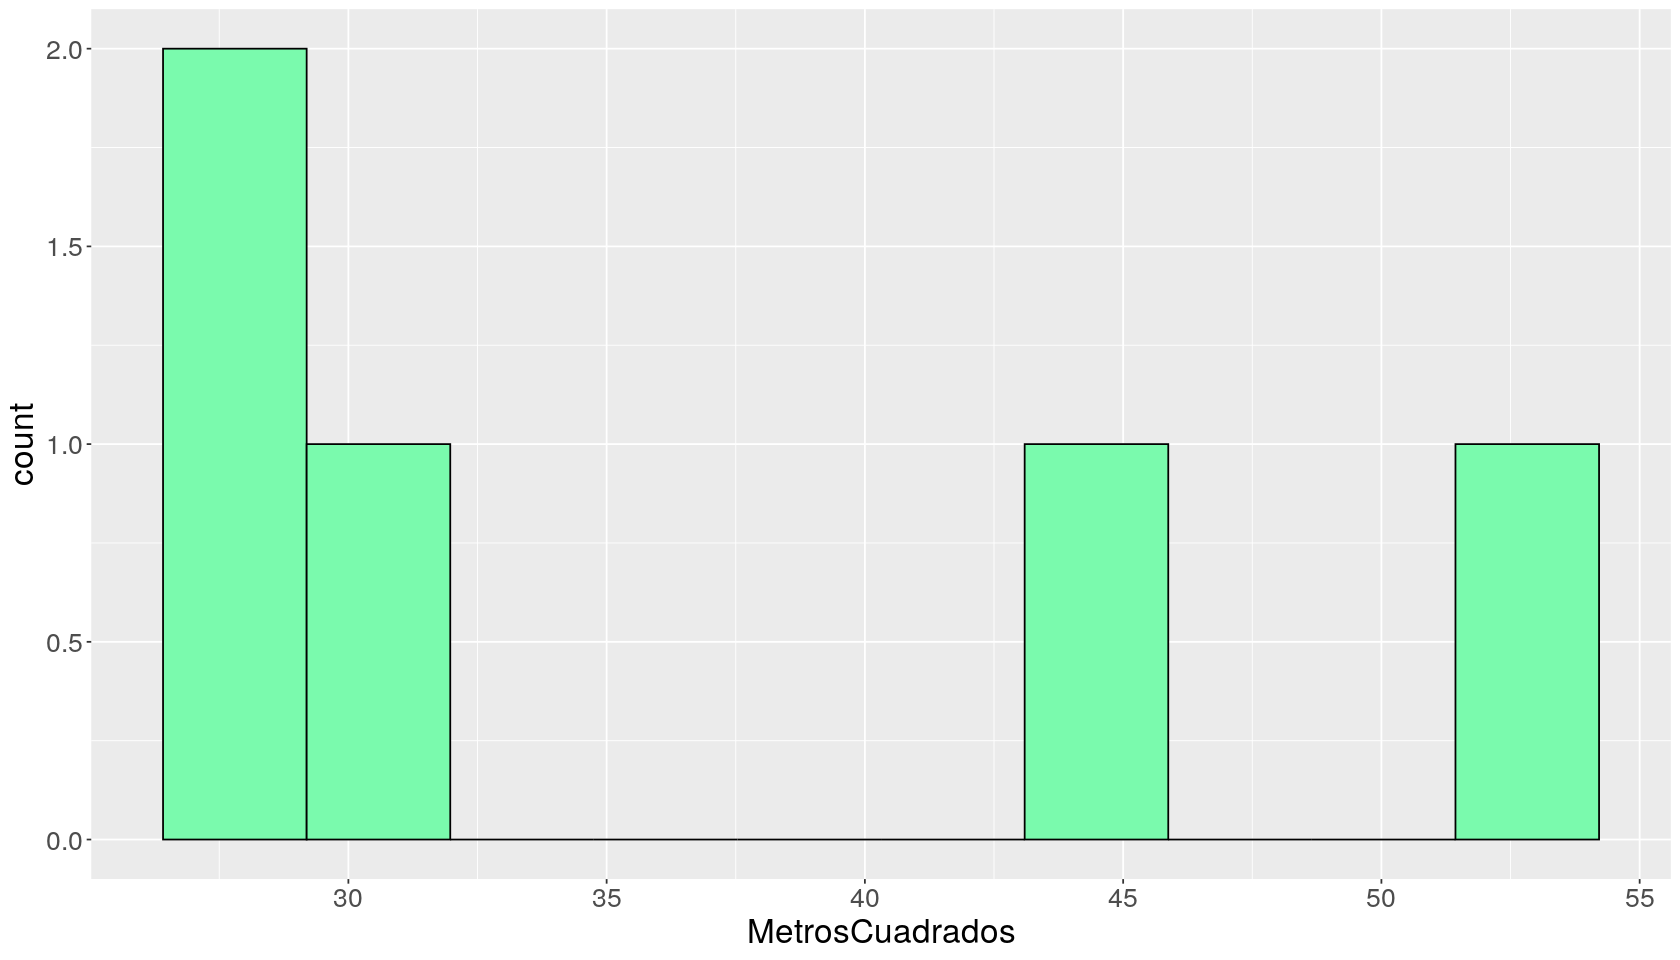

In [23]:
ggplot(data=tp_f_nep_df, aes(MetrosCuadrados))+
  geom_histogram(bins=10,fill=fillColor,color=borderColor)+ 
theme(tex=element_text(size=20))

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [24]:
t.test(x=tp_f_nep_df$MetrosCuadrados, y=tp_f_nep_df$Precio)


	Welch Two Sample t-test

data:  tp_f_nep_df$MetrosCuadrados and tp_f_nep_df$Precio
t = -5.8896, df = 5.3752, p-value = 0.001565
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -111.07026  -44.55008
sample estimates:
mean of x mean of y 
 36.35921 114.16938 


Usaremos el Test de Welch para comprobar la relación entre el precio y los metros cuadrados, y al obtener un p-valor inferior a 0.005 podemos asumir que a mayor espacio mayor cuantia a pagar.

---------------------------------------------------

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [25]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
model<-lm(data=barrio_sol,formula=MetrosCuadrados~NumBanyos+NumDormitorios+MaxOcupantes)
model


Call:
lm(formula = MetrosCuadrados ~ NumBanyos + NumDormitorios + MaxOcupantes, 
    data = barrio_sol)

Coefficients:
   (Intercept)       NumBanyos  NumDormitorios    MaxOcupantes  
        -1.827          18.028          23.544          -2.543  


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [26]:
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumBanyos + NumDormitorios + MaxOcupantes, 
    data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.723 -29.574  -0.324  30.441 110.415 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -1.827     13.708  -0.133  0.89443   
NumBanyos        18.028     13.362   1.349  0.18272   
NumDormitorios   23.544      8.183   2.877  0.00567 **
MaxOcupantes     -2.543      3.463  -0.734  0.46585   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.34 on 56 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3452,	Adjusted R-squared:  0.3102 
F-statistic: 9.843 on 3 and 56 DF,  p-value: 2.597e-05


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que no tienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


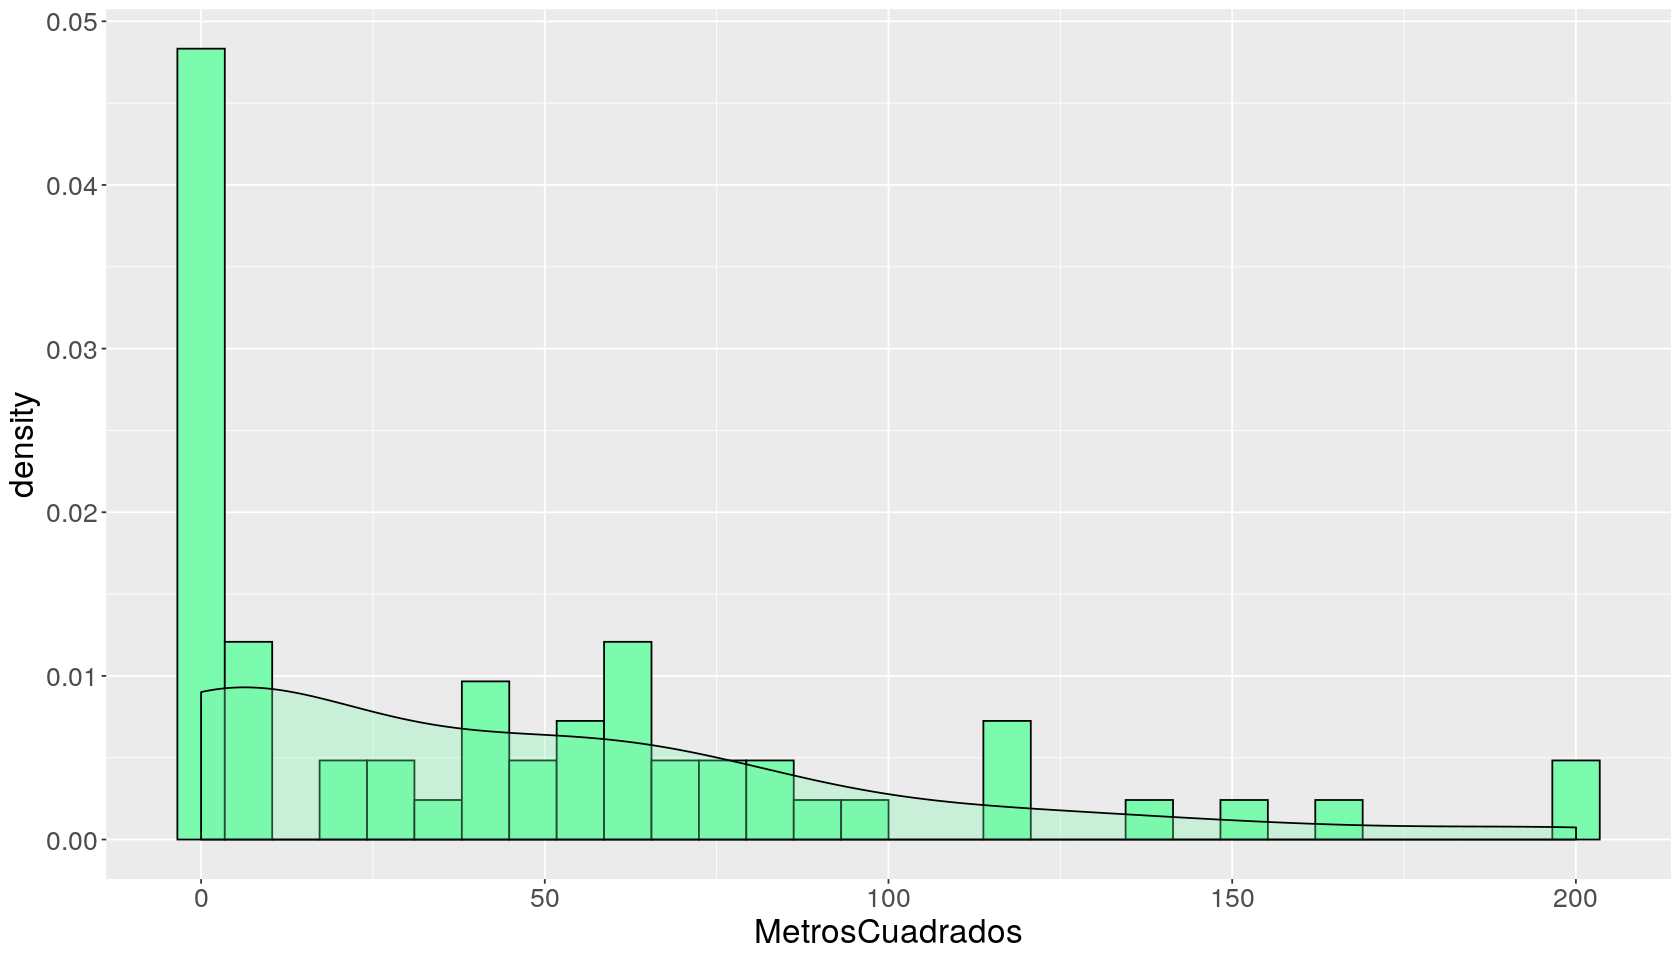

In [27]:
ggplot(barrio_sol, aes(x=MetrosCuadrados)) + 
 geom_histogram(aes(y=..density..), colour=borderColor, fill=fillColor)+
 geom_density(alpha=.3, fill=fillColor)+
theme(tex=element_text(size=20))


Podemos observar que hay una gran cantidad de apartamentos que tienen m² invalidos, es decir 0, lo cual nos lleva a plantearnos que los datos no son correctos.

----

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [28]:
barrio_sol_f <- na.omit(barrio_sol[barrio_sol$MetrosCuadrados>0, ])
barrio_sol_f <- barrio_sol_f[ , c('CodigoPostal','TipoPropiedad','TipoAlquiler','MaxOcupantes','NumDormitorios','TipoCama','Precio','MetrosCuadrados' )]
head(barrio_sol_f)

,CodigoPostal,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumDormitorios,TipoCama,Precio,MetrosCuadrados
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<dbl>
15,28013,Apartment,Entire home/apt,4,1,Real Bed,75,60.01534
25,28012,Apartment,Entire home/apt,4,1,Real Bed,100,69.95596
46,28013,Apartment,Entire home/apt,2,1,Real Bed,65,24.99091
574,28014,Apartment,Entire home/apt,8,4,Real Bed,250,200.02016
684,28012,Apartment,Entire home/apt,4,1,Real Bed,108,49.98181
690,28012,Apartment,Entire home/apt,10,2,Real Bed,98,134.98806


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [29]:
aovTest <- aov( Precio ~ NumDormitorios+MetrosCuadrados, data=barrio_sol_f)
summary(aovTest)

                Df Sum Sq Mean Sq F value   Pr(>F)    
NumDormitorios   1  95818   95818 128.465 1.97e-13 ***
MetrosCuadrados  1   2061    2061   2.763    0.105    
Residuals       36  26851     746                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Observamos que hay mayor relación del Precio del inmueble con NumDormitorios ya que tienen un p-valor mas significativo

---

In [69]:
p<-0.05
mn<-mean(barrio_sol_f$MetrosCuadrados)
items <- nrow(barrio_sol_f)
error<-qt(1-p/2,items-1)*sd(barrio_sol_f$MetrosCuadrados)/sqrt(items)

paste("Intervalo de confianza del 95% de la media de MetrosCuadrados será: [",mn-error,",",mn+error,"]")

[1] "Intervalo de confianza del 95% de la media de MetrosCuadrados será: [ 50.8518207837376 , 83.3525180367752 ]"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_f)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.193 -20.915  -6.988  21.134 124.855 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      46.0200    10.3072   4.465 7.27e-05 ***
MetrosCuadrados   0.8606     0.1236   6.961 3.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.2 on 37 degrees of freedom
Multiple R-squared:  0.5671,	Adjusted R-squared:  0.5554 
F-statistic: 48.46 on 1 and 37 DF,  p-value: 3.191e-08


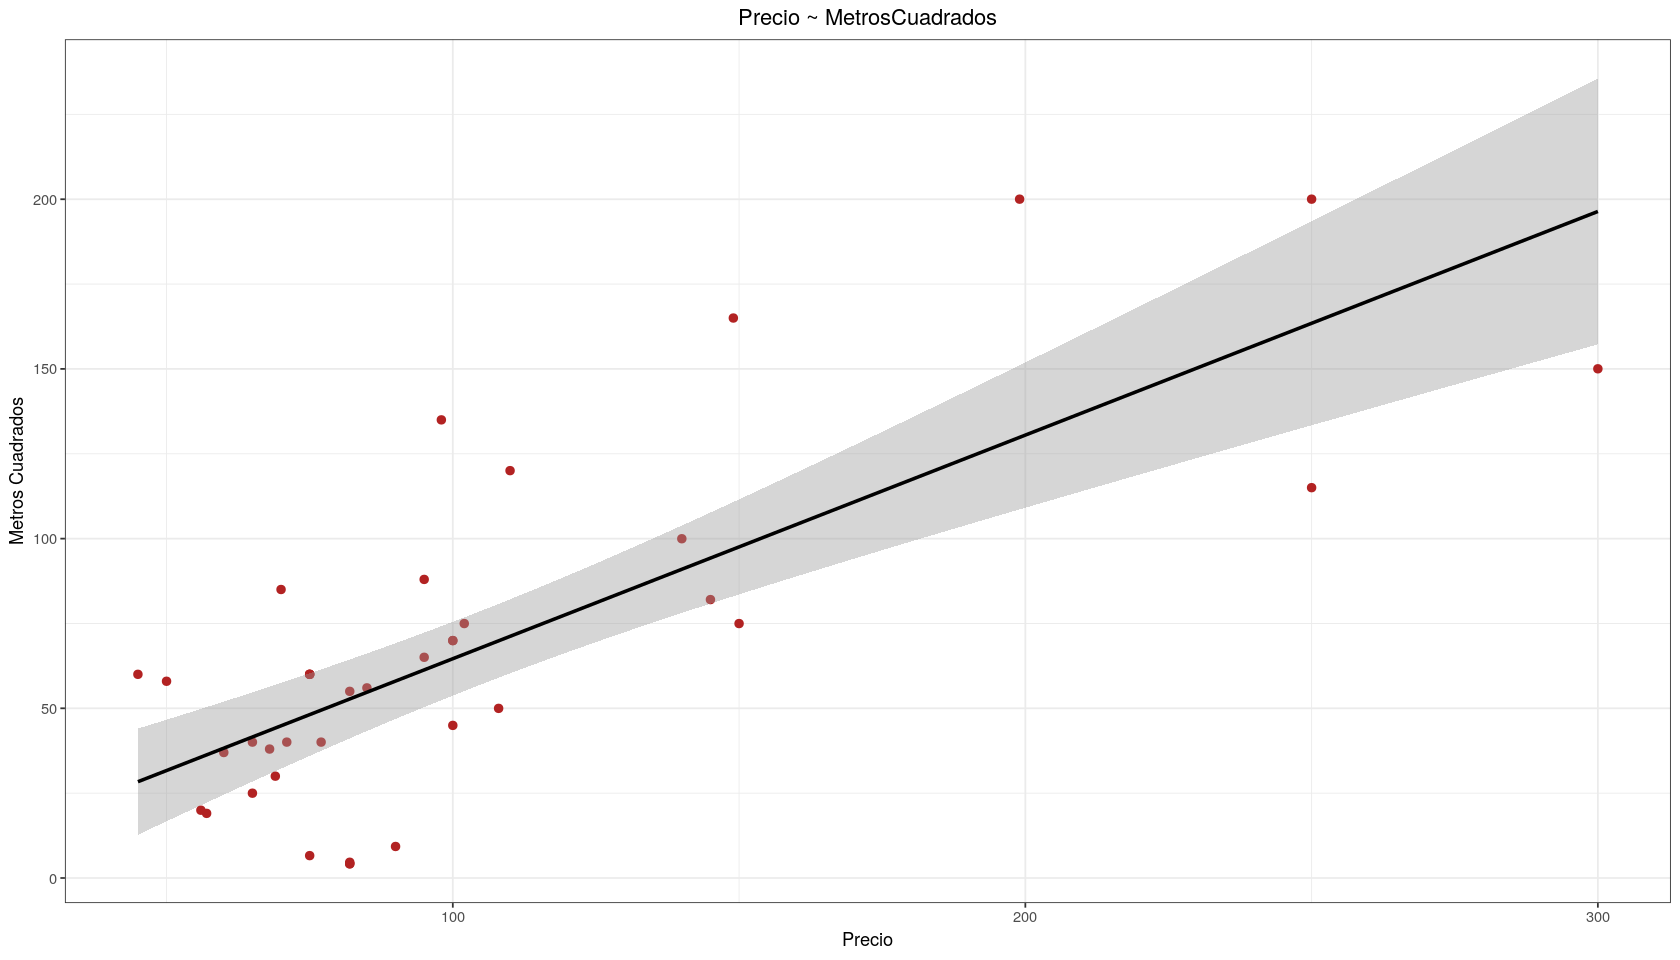

In [72]:
sm_bs <-lm(data=barrio_sol_f,formula=Precio~MetrosCuadrados)
summary(sm_bs)

ggplot(data = sm_bs, mapping = aes(x = Precio, y = MetrosCuadrados)) +
geom_point(color = "firebrick", size = 2) +
geom_smooth(method = "lm", se = TRUE, color = "black") +
labs(title = "Precio ~ MetrosCuadrados", x = "Precio", y = "Metros Cuadrados") +
theme_bw() + 
theme(plot.title = element_text(hjust = 0.5)) 

Como vemos en el resumen, la ecuacion de la recta será:

\begin{align}
y & = 46.02 + 0.86x \\
\end{align}

De este modo sabemos que la pendiente de la recta es 0.86, por lo que esto es lo que aumenta el precio por cada metro cuadrado 0.86€


-------

In [74]:
p<-0.05
mn_nr<-mean(barrio_sol_f$NumDormitorios)
items <- nrow(barrio_sol_f)
error_nr<-qt(1-p/2,items-1)*sd(barrio_sol_f$NumDormitorios)/sqrt(items)

paste("Intervalo de confianza del 95% de la media de NumDormitorios será: [",mn_nr-error_nr,",",mn_nr+error_nr,"]")

[1] "Intervalo de confianza del 95% de la media de NumDormitorios será: [ 1.16503764901199 , 1.96316747919314 ]"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_f)

Residuals:
   Min     1Q Median     3Q    Max 
-94.92 -15.76  -3.76  19.24  56.08 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      39.970      7.296   5.478 3.19e-06 ***
NumDormitorios   40.790      3.684  11.073 2.65e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.95 on 37 degrees of freedom
Multiple R-squared:  0.7682,	Adjusted R-squared:  0.7619 
F-statistic: 122.6 on 1 and 37 DF,  p-value: 2.651e-13


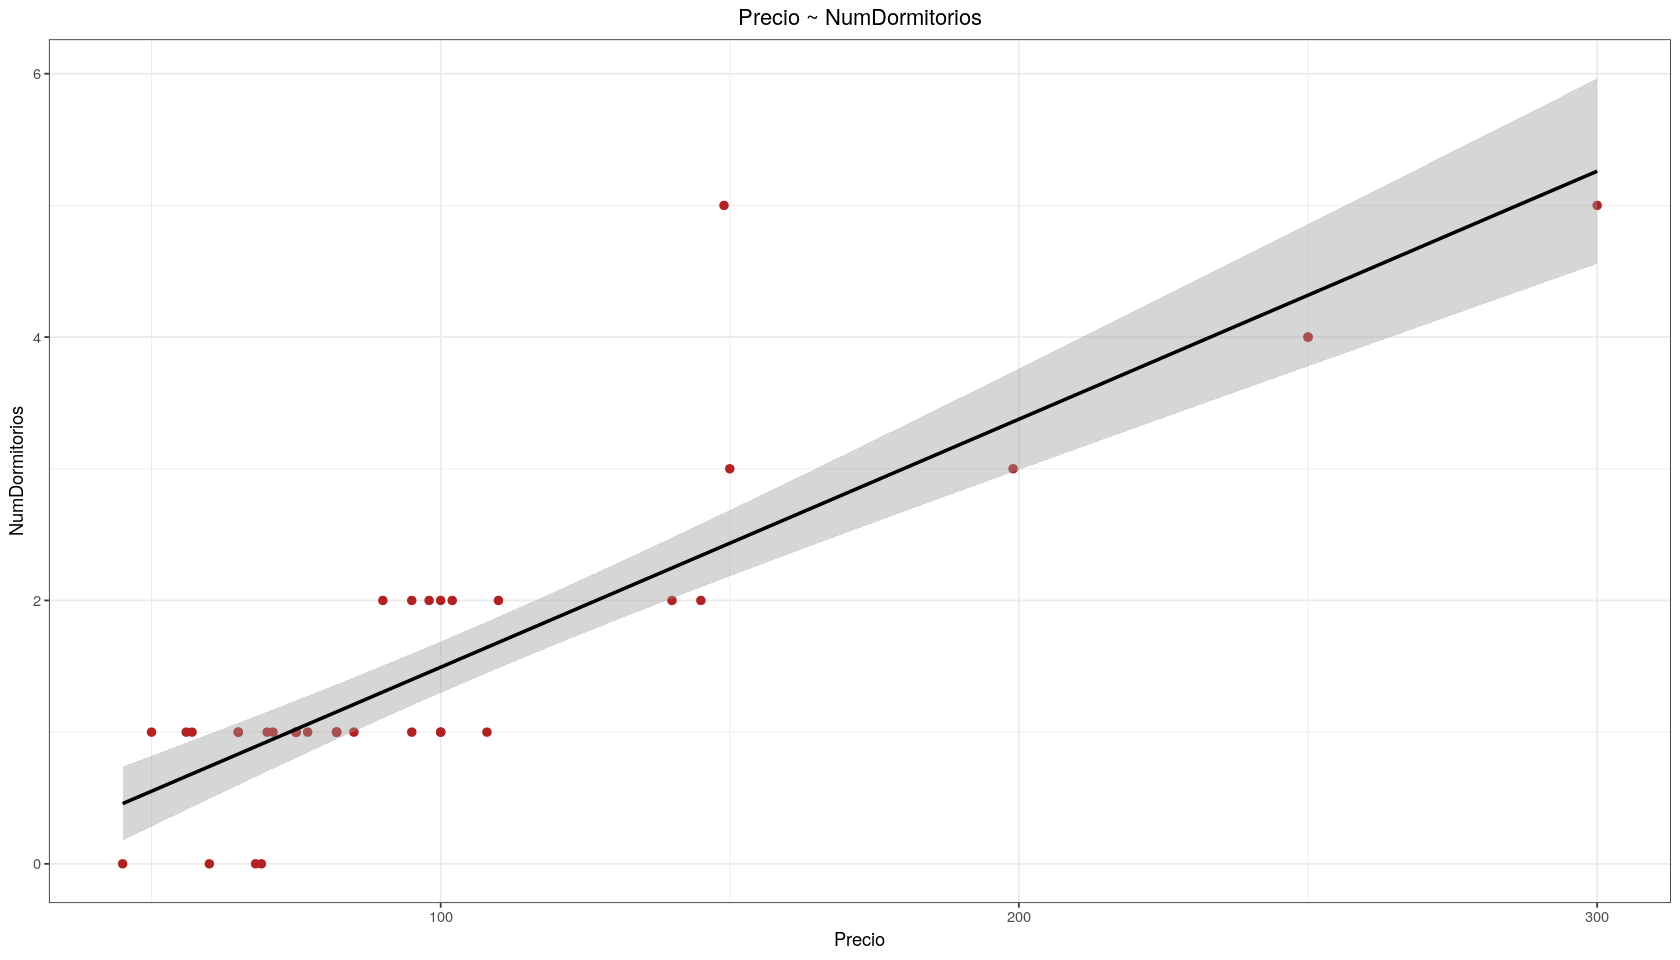

In [75]:
sm_bs <-lm(data=barrio_sol_f,formula=Precio~NumDormitorios)
summary(sm_bs)

ggplot(data = sm_bs, mapping = aes(x = Precio, y = NumDormitorios)) +
geom_point(color = "firebrick", size = 2) +
geom_smooth(method = "lm", se = TRUE, color = "black") +
labs(title = "Precio ~ NumDormitorios", x = "Precio", y = "NumDormitorios") +
theme_bw() + 
theme(plot.title = element_text(hjust = 0.5)) 

Como vemos en el resumen, la ecuacion de la recta será:

\begin{align}
y & = 39.97 + 40.79x \\
\end{align}

De este modo sabemos que la pendiente de la recta es 40.79, por lo que esto es lo que aumenta el precio por cada dormitorio extra 40.79€


---

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [81]:
p_tb <- nrow(barrio_sol_f[barrio_sol_f$NumDormitorios == 3,]) / nrow(barrio_sol_f)
mn_p <- mean(barrio_sol_f$NumDormitorios)
error_tb<-qt(1-p_tb/2,items-1)*sd(barrio_sol_f$NumDormitorios)/sqrt(items)
paste("La probabilidad de encontrar un apartamento con 3 dormitorios en Sol es:", p_tb)
paste("El margen de error será: [",mn_p-error_tb,",",mn_p+error_tb,"]")

[1] "La probabilidad de encontrar un apartamento con 3 dormitorios en Sol es: 0.0512820512820513"

[1] "El margen de error será: [ 1.16736104119441 , 1.96084408701071 ]"